## Featre Addition

### 1) 주변링크의 평균 통행

In [1]:
import pandas as pd


pd.options.display.float_format = '{: .2f}'.format

pub_station = pd.read_csv('../data/main_tables/PUB_STATION.csv')
link = pd.read_csv('../data/qgis/stationbuffer_x_links.csv', usecols=['sid', 'LINK_ID'])
trip = pd.read_csv('../data/qgis/taxi_trip.csv', encoding='cp949').rename(columns={' 평균통행량 ':'mean_trip', '링크아이디':'LINK_ID'})

In [2]:
display(pub_station.head())
display(link.head())
display(trip.head())

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00


,sid,LINK_ID
0,강원_홍천_화양강휴게소,2570039102.00
1,강원_홍천_화양강휴게소,2570039202.00
2,강원_홍천_화양강휴게소,2570133000.00
3,강원_홍천_화양강휴게소,2570133100.00
4,강원_홍천_화양강휴게소,2570133300.00


,지역,LINK_ID,도로명,mean_trip
0,서울특별시 종로구,1000000301,종로,297.20
1,서울특별시 종로구,1000000302,종로,179.50
2,서울특별시 종로구,1000000303,종로,147.40
3,서울특별시 종로구,1000000401,종로,354.20
4,서울특별시 종로구,1000000402,종로,315.40


In [3]:
# 링크 데이터에 평균 통행 조인 이후, sid단위로 평균 집계
mean_trip = link.merge(trip[['LINK_ID', 'mean_trip']], how='left', on='LINK_ID').groupby(['sid']).mean_trip.mean()
mean_trip

sid
강원_강릉_HAPPY700 평창시네마      26.23
강원_강릉_감자연구소               63.23
강원_강릉_강남동주민센터            216.67
강원_강릉_강릉농협 하나로마트        1768.30
강원_강릉_강릉축협 하나로마트         901.94
                         ...   
충북_충주_중앙탑면 행정복지센터         54.12
충북_충주_충주시청 민원주차장         497.77
충북_충주_충주실내체육관            991.82
충북_충주_충주종합스포츠타운          126.17
충북_충주_평생학습관              419.35
Name: mean_trip, Length: 1304, dtype: float64

In [4]:
pub_station = pub_station.merge(mean_trip, on='sid')
pub_station.head()

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,mean_trip
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,16.25
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,128.35
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,31.89
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00,101.35
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00,351.55


In [5]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  1304 non-null   object 
 1   sid           1304 non-null   object 
 2   address       1304 non-null   object 
 3   lat           1304 non-null   float64
 4   long          1304 non-null   float64
 5   district_lv2  1304 non-null   object 
 6   district_lv3  1304 non-null   object 
 7   fast_cnt      1304 non-null   int64  
 8   slow_cnt      1304 non-null   int64  
 9   mean_speed    1293 non-null   float64
 10  mean_trip     1216 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 122.2+ KB


### 2) 도로종류별 길이

In [6]:
length = pd.read_csv('../data/qgis/stationbuffer_x_linklength.csv', usecols=['sid', 'length_highway', 'length_national', 'length_local', 'length_city'])

In [7]:
length.head()

,sid,length_highway,length_national,length_local,length_city
0,강원_홍천_화양강휴게소,0.00,2065.53,0.00,2590.38
1,서울_마포용산_상암월드컵경기장,499.55,4236.51,0.00,2929.40
2,제주_서귀포_대정읍사무소,0.00,0.00,1816.24,7394.46
3,제주_제주직할_애월119센터,0.00,0.00,1963.83,405.02
4,대구_동대구_수성구민운동장,0.00,0.00,0.00,5064.36


In [8]:
pub_station = pub_station.merge(length, how='left', on='sid')
pub_station.head()

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,mean_trip,length_highway,length_national,length_local,length_city
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,16.25,0.00,2065.53,0.00,2590.38
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,128.35,499.55,4236.51,0.00,2929.40
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,31.89,0.00,0.00,1816.24,7394.46
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00,101.35,0.00,0.00,1963.83,405.02
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00,351.55,0.00,0.00,0.00,5064.36


In [9]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     1304 non-null   object 
 1   sid              1304 non-null   object 
 2   address          1304 non-null   object 
 3   lat              1304 non-null   float64
 4   long             1304 non-null   float64
 5   district_lv2     1304 non-null   object 
 6   district_lv3     1304 non-null   object 
 7   fast_cnt         1304 non-null   int64  
 8   slow_cnt         1304 non-null   int64  
 9   mean_speed       1293 non-null   float64
 10  mean_trip        1216 non-null   float64
 11  length_highway   1304 non-null   float64
 12  length_national  1304 non-null   float64
 13  length_local     1304 non-null   float64
 14  length_city      1304 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 163.0+ KB


### 3) 반경 내 용도지역
- 용도지역 코드 전처리
    - 슬라이싱 및 인코딩 필요
- 용도지역 데이터가 '도시지역'에 제한되어있어 매핑된 sid도 도시지역만 남음

In [10]:
district = pd.read_csv('../data/qgis/stationbuffer_x_district.csv', usecols=['sid', 'A1', 'area'])
district.head()

,sid,A1,area
0,서울_마포용산_상암월드컵경기장,61100001144020140145UQA4300417003,80670.19
1,서울_마포용산_상암월드컵경기장,15000001144020039117UQA1230001001,1695.40
2,서울_마포용산_상암월드컵경기장,15000001144020020001UQA4300001001,159593.97
3,서울_마포용산_상암월드컵경기장,61100001144020130103UQA1220426011,35212.77
4,서울_마포용산_상암월드컵경기장,61100001144020130103UQA1300426012,193026.33


In [11]:
import numpy as np

district['dcode'] = district['A1'].map(lambda x: x[20:26] if x is not np.nan else x) \
                                  .map(lambda x: 'UQA500' if x ==  'UAQ500'  else x)

In [12]:
dgm = pd.read_csv('../data/dgm_code.csv', encoding='cp949')

In [13]:
dgm.head()

,UCODE,UNAME,DIV,LAW_NM,AR_GBN,LAW_CD,BYUL_YN,EXEC_DT,JO_NO,JO_SUB_NO,REC_SEQNO,PARENT_UCODE,DEL_DT,DEL_TXT,TERMS_NO,FRST_REGIST_DT,LAST_UPDT_DT
0,UNIM04,비행안전 제4구역,군사,군사기지 및 군사시설 보호법,NaN,10375.00,0.00,20080922.00,400.00,0.00,530.00,UNE400,NaN,NaN,NaN,20220908,20220908
1,UHK100,일반물류단지,공업,물류시설의 개발 및 운영에 관한 법률 제22조,NaN,10387.00,0.00,20080906.00,2200.00,0.00,1020.00,000000,NaN,NaN,205.00,20220908,20220908
2,UMK400,(한강)건축 등 허가제한지역,환경,한강수계 상수원수질개선 및 주민지원 등에 관한 법률,NaN,9136.00,0.00,20140131.00,500.00,0.00,2132.00,000000,NaN,NaN,NaN,20220908,20220908
3,UNE114,통제보호구역(해군기지),국방,군사기지 및 군사시설 보호법,NaN,10375.00,0.00,20090910.00,400.00,0.00,NaN,UNE110,NaN,NaN,NaN,20220908,20220908
4,UQS700,항만,국토종합,국토의 계획 및 이용에 관한 법률 시행령,NaN,9419.00,0.00,20170101.00,8300.00,1000000000.00,NaN,NaN,NaN,NaN,NaN,20220908,20220908


In [14]:
# 참고: https://alpmint.tistory.com/1922
# 코드 변환 데이터에 존재하지 않는 코드는 검색으로 찾아 수동으로 부여
dcode_table = pd.DataFrame(district.dcode.unique(), columns=['dcode'])
dcode_table = dcode_table.merge(dgm[['UCODE', 'UNAME']], how='left', left_on='dcode', right_on='UCODE').drop(columns=['UCODE'])
dcode_table = dcode_table.sort_values('dcode').rename(columns={'UNAME':'dname'})
dcode_table['counts'] = district.drop_duplicates(['sid', 'dcode']).dcode.value_counts().sort_index().values
dcode_table.loc[dcode_table.dcode == 'UQA500', 'dname'] = '도시지역미지정'
dcode_table.loc[dcode_table.dcode == 'UQA999', 'dname'] = '도시지역기타'
dcode_table.loc[dcode_table.dcode == 'UQA01X', 'dname'] = 'error'
dcode_table

,dcode,dname,counts
12,UQA01X,error,258
21,UQA100,주거지역,2
8,UQA111,제1종전용주거지역,46
17,UQA112,제2종전용주거지역,25
11,UQA120,일반주거지역,9
4,UQA121,제1종일반주거지역,684
2,UQA122,제2종일반주거지역,889
1,UQA123,제3종일반주거지역,514
3,UQA130,준주거지역,564
20,UQA200,상업지역,2


In [15]:
# 세부 분류를 그룹화
def decode_grouper(name):
    if '주거' in name:
        return '주거지역'
    if '상업' in name:
        return '상업지역'
    if '녹지' in name:
        return '녹지지역'
    if '공업' in name:
        return '공업지역'
    return '기타'

In [16]:
dcode_table.dname = dcode_table.dname.map(decode_grouper)
dcode_table

,dcode,dname,counts
12,UQA01X,기타,258
21,UQA100,주거지역,2
8,UQA111,주거지역,46
17,UQA112,주거지역,25
11,UQA120,주거지역,9
4,UQA121,주거지역,684
2,UQA122,주거지역,889
1,UQA123,주거지역,514
3,UQA130,주거지역,564
20,UQA200,상업지역,2


In [17]:
district = district.merge(dcode_table[['dcode', 'dname']], how='left', on='dcode').drop(columns=['A1', 'dcode'])

In [18]:
district.head()

,sid,area,dname
0,서울_마포용산_상암월드컵경기장,80670.19,녹지지역
1,서울_마포용산_상암월드컵경기장,1695.40,주거지역
2,서울_마포용산_상암월드컵경기장,159593.97,녹지지역
3,서울_마포용산_상암월드컵경기장,35212.77,주거지역
4,서울_마포용산_상암월드컵경기장,193026.33,주거지역


<AxesSubplot: ylabel='Frequency'>

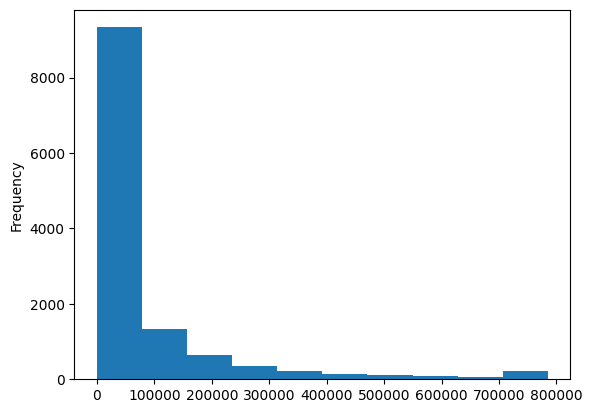

In [19]:
district.area.plot(kind='hist')

In [20]:
district = district.groupby(['sid', 'dname']).area.sum().to_frame().reset_index()

In [21]:
district.head()

,sid,dname,area
0,강원_강릉_강남동주민센터,녹지지역,423671.88
1,강원_강릉_강남동주민센터,주거지역,360979.87
2,강원_강릉_강릉농협 하나로마트,녹지지역,205504.87
3,강원_강릉_강릉농협 하나로마트,상업지역,255227.75
4,강원_강릉_강릉농협 하나로마트,주거지역,323921.02


In [22]:
# 각 용도지역 너비의 합을 1로 처리

def normalize_area(sid_df):
        sid_df.area = sid_df.area / sid_df.area.sum()
        return sid_df

district = district.groupby('sid', group_keys=False).apply(normalize_area)        

<AxesSubplot: ylabel='Frequency'>

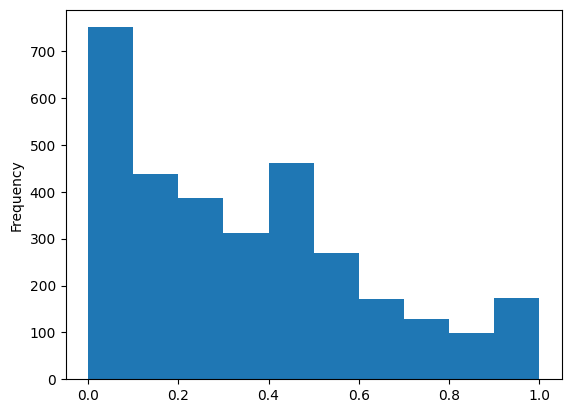

In [23]:
district.area.plot(kind='hist')

In [24]:
# 각 sid별 최다 지역
major_dcode = district.sort_values('area', ascending=False).groupby('sid').dname.first()
major_dcode.head(3)

sid
강원_강릉_강남동주민센터       녹지지역
강원_강릉_강릉농협 하나로마트    주거지역
강원_강릉_강릉축협 하나로마트    주거지역
Name: dname, dtype: object

In [25]:
# 각 sid별 용도지역 차지비율
district_ratio = district.pivot(index='sid', columns='dname', values='area').reset_index().fillna(0) \
                         .rename(columns={'공업지역':'indust_ratio', '기타':'etc_ratio', '녹지지역':'green_ratio', '상업지역':'commerce_ratio', '주거지역':'reside_ratio'})
district_ratio.head(3)

dname,sid,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio
0,강원_강릉_강남동주민센터,0.00,0.00,0.54,0.00,0.46
1,강원_강릉_강릉농협 하나로마트,0.00,0.00,0.26,0.33,0.41
2,강원_강릉_강릉축협 하나로마트,0.00,0.00,0.42,0.00,0.58


In [26]:
pub_station = pub_station.merge(district_ratio, how='left', on='sid').merge(major_dcode, how='left', on='sid')
pub_station.head(3)

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,...,length_highway,length_national,length_local,length_city,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio,dname
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,...,0.00,2065.53,0.00,2590.38,NaN,NaN,NaN,NaN,NaN,NaN
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,...,499.55,4236.51,0.00,2929.40,0.00,0.00,0.68,0.00,0.32,녹지지역
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,...,0.00,0.00,1816.24,7394.46,0.00,0.00,0.30,0.12,0.58,주거지역


In [27]:
road_values = pub_station[['length_highway', 'length_national', 'length_local', 'length_city']].values
road_values.shape, road_values.sum(axis=1).shape

new_col = ['highway_ratio', 'national_ratio', 'local_ratio', 'city_ratio']
road_values / road_values.sum(axis=1)[:,np.newaxis]
pub_station[new_col] = road_values / road_values.sum(axis=1)[:,np.newaxis]

/tmp/ipykernel_54318/1991794323.py:5: RuntimeWarning: invalid value encountered in divide
  road_values / road_values.sum(axis=1)[:,np.newaxis]
/tmp/ipykernel_54318/1991794323.py:6: RuntimeWarning: invalid value encountered in divide
  pub_station[new_col] = road_values / road_values.sum(axis=1)[:,np.newaxis]


In [28]:
pub_station

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,...,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio,dname,highway_ratio,national_ratio,local_ratio,city_ratio
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.44,0.00,0.56
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,...,0.00,0.00,0.68,0.00,0.32,녹지지역,0.07,0.55,0.00,0.38
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,...,0.00,0.00,0.30,0.12,0.58,주거지역,0.00,0.00,0.20,0.80
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00,...,0.00,0.00,1.00,0.00,0.00,녹지지역,0.00,0.00,0.83,0.17
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00,...,0.00,0.00,0.54,0.04,0.42,녹지지역,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,대리천 공영주차장,부산울산_북부산_대리천 공영주차장,부산광역시 북구 덕천동 732-5,35.21,129.00,부산광역시_북구,부산광역시_북구_덕천동,1,0,50.00,...,0.00,0.22,0.37,0.24,0.18,녹지지역,0.05,0.30,0.00,0.65
1300,2생활권 환승주차장2(B),대전세종충남_세종_2생활권 환승주차장2(B),세종특별자치시 나성동 778,36.48,127.26,세종특별자치시_나성동,세종특별자치시_나성동_778,2,0,50.00,...,0.00,0.00,0.18,0.56,0.26,상업지역,0.00,0.00,0.09,0.91
1301,강화지사,인천_강화_강화지사,인천광역시 강화군 강화읍 갑곳리 350,37.74,126.50,인천광역시_강화군,인천광역시_강화군_강화읍,1,0,50.00,...,0.00,0.00,1.00,0.00,0.00,녹지지역,0.00,0.00,0.00,1.00
1302,대합일반산업단지 전기차 충전소,경남_창녕_대합일반산업단지 전기차 충전소,경상남도 창녕군 대합면 합리 1422,35.61,128.44,경상남도_창녕군,경상남도_창녕군_대합면,1,0,50.00,...,1.00,0.00,0.00,0.00,0.00,공업지역,0.00,0.00,0.00,1.00


In [29]:
pub_station.columns

Index(['station_name', 'sid', 'address', 'lat', 'long', 'district_lv2',
       'district_lv3', 'fast_cnt', 'slow_cnt', 'mean_speed', 'mean_trip',
       'length_highway', 'length_national', 'length_local', 'length_city',
       'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio',
       'reside_ratio', 'dname', 'highway_ratio', 'national_ratio',
       'local_ratio', 'city_ratio'],
      dtype='object')

In [30]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     1304 non-null   object 
 1   sid              1304 non-null   object 
 2   address          1304 non-null   object 
 3   lat              1304 non-null   float64
 4   long             1304 non-null   float64
 5   district_lv2     1304 non-null   object 
 6   district_lv3     1304 non-null   object 
 7   fast_cnt         1304 non-null   int64  
 8   slow_cnt         1304 non-null   int64  
 9   mean_speed       1293 non-null   float64
 10  mean_trip        1216 non-null   float64
 11  length_highway   1304 non-null   float64
 12  length_national  1304 non-null   float64
 13  length_local     1304 non-null   float64
 14  length_city      1304 non-null   float64
 15  indust_ratio     1122 non-null   float64
 16  etc_ratio        1122 non-null   float64
 17  green_ratio   

## 모델링 sid로 제한

In [31]:
sequences = pd.read_csv('../data/input_table/final_data/fast_history_by_station_size20.csv', parse_dates=['time'])

In [32]:
sequences.set_index('time').columns

Index(['강원_강릉_HAPPY700 평창시네마', '강원_강릉_강남동주민센터', '강원_강릉_강릉축협 하나로마트',
       '강원_강릉_강원도교육연수원', '강원_강릉_강원양돈농협 하나로마트', '강원_강릉_경포해수욕장', '강원_강릉_교2동주민센터',
       '강원_강릉_녹색도시체험센터', '강원_강릉_대관령면 관광안내소', '강원_강릉_보헤미안박이추 커피공장',
       ...
       '충북_충주_금릉주차장', '충북_충주_노은면 행정복지센터', '충북_충주_대소원면 주민자치센터',
       '충북_충주_성서동 공영주차장', '충북_충주_이마트 충주점', '충북_충주_중앙탑면 행정복지센터',
       '충북_충주_충주시청 민원주차장', '충북_충주_충주실내체육관', '충북_충주_충주종합스포츠타운', '충북_충주_평생학습관'],
      dtype='object', length=828)

In [33]:
pub_station = pub_station[pub_station.sid.isin(sequences.columns)].dropna()

In [34]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 1 to 1135
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     690 non-null    object 
 1   sid              690 non-null    object 
 2   address          690 non-null    object 
 3   lat              690 non-null    float64
 4   long             690 non-null    float64
 5   district_lv2     690 non-null    object 
 6   district_lv3     690 non-null    object 
 7   fast_cnt         690 non-null    int64  
 8   slow_cnt         690 non-null    int64  
 9   mean_speed       690 non-null    float64
 10  mean_trip        690 non-null    float64
 11  length_highway   690 non-null    float64
 12  length_national  690 non-null    float64
 13  length_local     690 non-null    float64
 14  length_city      690 non-null    float64
 15  indust_ratio     690 non-null    float64
 16  etc_ratio        690 non-null    float64
 17  green_ratio    

In [35]:
seq = sequences.set_index('time').T.reset_index().rename(columns={'index':'sid'})
seq = seq[seq.sid.isin(pub_station.sid)].set_index('sid')  # 690개 스테이션 제한

<AxesSubplot: ylabel='Frequency'>

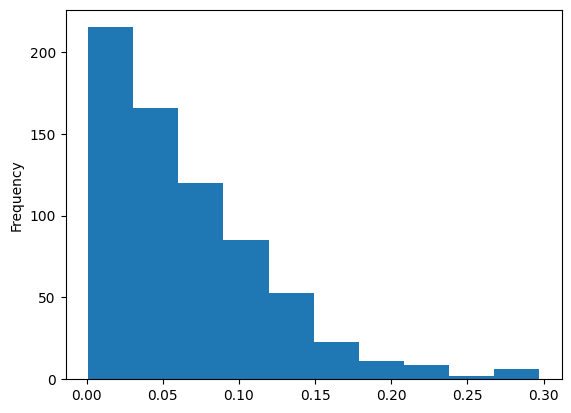

In [36]:
seq.mean(axis=1).plot(kind='hist')

In [37]:
seq.mean(axis=1).ge(0.1).sum()

158

## Dimensionality Reduction

In [38]:
pub_station.columns

Index(['station_name', 'sid', 'address', 'lat', 'long', 'district_lv2',
       'district_lv3', 'fast_cnt', 'slow_cnt', 'mean_speed', 'mean_trip',
       'length_highway', 'length_national', 'length_local', 'length_city',
       'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio',
       'reside_ratio', 'dname', 'highway_ratio', 'national_ratio',
       'local_ratio', 'city_ratio'],
      dtype='object')

In [39]:
# 총 690개의 station
n_station = pub_station.shape[0]
print('number of stations: ', n_station)

number of stations:  690


In [40]:
# station_features = ['lat', 'long', 'fast_cnt', 'slow_cnt', 'mean_trip', 'mean_speed',
#                     'length_highway', 'length_national', 'length_local', 'length_city', 
#                     'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio', 'reside_ratio']

station_features = ['lat', 'long', 'fast_cnt', 'slow_cnt', 'mean_trip', 'mean_speed',
                    'highway_ratio', 'national_ratio', 'local_ratio', 'city_ratio',
                    'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio', 'reside_ratio']

In [41]:
pub_station[station_features].describe()

,lat,long,fast_cnt,slow_cnt,mean_trip,mean_speed,highway_ratio,national_ratio,local_ratio,city_ratio,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio
count,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00
mean,36.30,127.70,1.40,0.07,316.28,53.57,0.03,0.07,0.07,0.83,0.05,0.11,0.37,0.09,0.38
std,1.19,0.92,0.76,0.39,429.16,12.61,0.08,0.14,0.16,0.21,0.16,0.21,0.32,0.15,0.26
min,33.21,126.18,1.00,0.00,0.42,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,35.29,126.92,1.00,0.00,57.50,50.00,0.00,0.00,0.00,0.74,0.00,0.00,0.10,0.00,0.17
50%,36.34,127.46,1.00,0.00,150.73,50.00,0.00,0.00,0.00,0.89,0.00,0.00,0.30,0.02,0.37
75%,37.47,128.59,2.00,0.00,378.77,50.00,0.00,0.12,0.02,1.00,0.00,0.00,0.57,0.13,0.57
max,38.21,130.91,8.00,4.00,2526.10,100.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [42]:
X_train = pub_station[station_features].values

In [43]:
X_train.shape

(690, 15)

In [44]:
X_train

array([[3.75683832e+01, 1.26894943e+02, 7.00000000e+00, ...,
        6.78811840e-01, 0.00000000e+00, 3.21188160e-01],
       [3.58513140e+01, 1.28629358e+02, 1.00000000e+00, ...,
        5.39543638e-01, 4.01930023e-02, 4.20263359e-01],
       [3.35230150e+01, 1.26588182e+02, 2.00000000e+00, ...,
        4.45555649e-01, 0.00000000e+00, 5.54444351e-01],
       ...,
       [3.61635870e+01, 1.27759153e+02, 1.00000000e+00, ...,
        4.27484468e-01, 0.00000000e+00, 5.72515532e-01],
       [3.78775282e+01, 1.27734108e+02, 1.00000000e+00, ...,
        0.00000000e+00, 3.52882864e-01, 6.47117136e-01],
       [3.71764396e+01, 1.28992347e+02, 1.00000000e+00, ...,
        4.86683540e-01, 2.73302124e-01, 2.40014336e-01]])

### Scaling

In [45]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

X_train = pub_station[station_features].values
scaler = MinMaxScaler((-1,1))
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#### checkpoint: feature set before dim. reduction

In [46]:
# pub_station_scaled = pd.DataFrame(data=X_train, columns=station_features)
# pub_station_scaled['sid'] = pub_station.sid.values
# pub_station_scaled.head()

In [47]:
import umap

trans = umap.UMAP(n_neighbors=5, n_components=2, metric='euclidean', random_state=42).fit(X_train)

/tmp/ipykernel_54318/2154582215.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, cmap='Spectral')


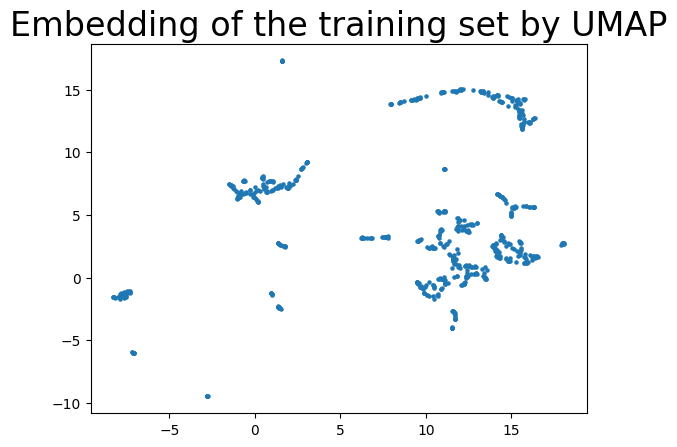

In [48]:
import matplotlib.pyplot as plt

plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [49]:
trans = umap.UMAP(n_neighbors=5, n_components=8, metric='euclidean', random_state=42).fit(X_train)

In [50]:
pub_station_embedding = pd.DataFrame(data=trans.embedding_, index=pub_station.sid, columns=[ 'dim_' + str(i) for i in range(8)]).reset_index()

In [51]:
pub_station_embedding

,sid,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7
0,서울_마포용산_상암월드컵경기장,7.71,7.72,5.58,6.09,5.40,7.61,4.03,3.06
1,대구_동대구_수성구민운동장,8.21,7.08,5.75,6.37,6.09,8.12,3.48,5.23
2,제주_제주직할_제주 삼양 유적지,8.48,0.10,6.15,-0.83,5.55,3.71,6.81,2.96
3,남서울_구로금천_고척스카이돔,7.62,7.47,5.53,5.92,5.66,7.51,4.16,3.21
4,경기_성남_성남지사(공용),7.69,7.64,4.20,7.81,5.49,4.44,4.74,5.65
...,...,...,...,...,...,...,...,...,...
685,부산울산_남부산_해운대구청별관,2.16,13.73,3.48,6.45,5.72,1.40,4.65,2.50
686,강원_강원직할_농어촌공사 강원본부,-3.20,3.62,5.94,4.42,3.19,3.20,2.90,3.43
687,충북_영동_영동군 농업기술센터,7.22,7.37,4.79,5.19,5.72,7.64,4.95,2.73
688,강원_강원직할_춘천 동부시장,7.37,6.66,3.37,7.45,6.47,2.60,4.54,5.36


In [52]:
pub_station_attributes = pd.DataFrame(data=X_train, index=pub_station.sid, columns=station_features).reset_index()
pub_station_attributes

,sid,lat,long,fast_cnt,slow_cnt,mean_trip,mean_speed,highway_ratio,national_ratio,local_ratio,city_ratio,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio
0,서울_마포용산_상암월드컵경기장,0.56,-0.34,6.00,3.00,-0.07,0.00,0.07,4.46,0.00,-1.96,0.00,0.00,0.82,-0.19,-0.11
1,대구_동대구_수성구민운동장,-0.23,0.70,0.00,2.00,0.63,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.52,0.12,0.13
2,제주_제주직할_제주 삼양 유적지,-1.30,-0.52,1.00,0.00,-0.08,0.00,0.00,0.00,8.02,-0.34,0.00,0.00,0.32,-0.19,0.47
3,남서울_구로금천_고척스카이돔,0.53,-0.35,2.00,0.00,0.10,0.00,0.16,1.32,0.00,-0.81,0.49,0.00,-0.07,-0.19,-0.29
4,경기_성남_성남지사(공용),0.51,-0.20,1.00,1.00,2.51,0.00,0.00,1.43,0.00,-0.27,0.00,0.00,-0.61,0.91,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,부산울산_남부산_해운대구청별관,-0.53,1.00,0.00,0.00,1.90,50.00,0.00,0.00,6.56,-0.21,0.08,84.92,-0.27,1.09,-0.24
686,강원_강원직할_농어촌공사 강원본부,0.72,0.16,0.00,0.00,1.48,50.00,0.00,0.00,1.51,0.27,0.00,0.00,-0.30,-0.18,1.19
687,충북_영동_영동군 농업기술센터,-0.08,0.18,0.00,0.00,-0.09,0.00,0.00,2.98,0.00,-1.01,0.00,0.00,0.28,-0.19,0.51
688,강원_강원직할_춘천 동부시장,0.71,0.16,0.00,0.00,6.94,0.00,0.00,0.00,0.00,0.41,0.00,0.00,-0.63,2.57,0.70


### Save


In [50]:
import os
import numpy as np


ROOT_DIR = '../data/input_table/final_data'

pub_station_embedding.to_csv(os.path.join(ROOT_DIR, 'station_embedding_v2.csv'), index=False)
pub_station_attributes.to_csv(os.path.join(ROOT_DIR,'station_attributes_v2.csv'), index=False)

# mopdel input selection - save sequences
seq_labeled = pd.read_csv(os.path.join(ROOT_DIR, 'fast_history_by_station_size20_bin3.csv'), parse_dates=['time']) \
    .set_index('time').T.reset_index().rename(columns={'index':'sid'})
seq_labeled = seq_labeled[seq_labeled.sid.isin(pub_station.sid)].set_index('sid')

modeling_seq = seq_labeled[seq.mean(axis=1).ge(0.1)].copy()
# modeling_seq[modeling_seq.index.isin(pub_station.sid)].T.reset_index().to_csv(os.path.join(ROOT_DIR, 'total_sequences_multicls_size20_bin3_dim8.csv'), index=False)

In [51]:
modeling_seq

time,2021-07-01 00:00:00,2021-07-01 00:20:00,2021-07-01 00:40:00,2021-07-01 01:00:00,2021-07-01 01:20:00,2021-07-01 01:40:00,2021-07-01 02:00:00,2021-07-01 02:20:00,2021-07-01 02:40:00,2021-07-01 03:00:00,...,2021-09-30 20:40:00,2021-09-30 21:00:00,2021-09-30 21:20:00,2021-09-30 21:40:00,2021-09-30 22:00:00,2021-09-30 22:20:00,2021-09-30 22:40:00,2021-09-30 23:00:00,2021-09-30 23:20:00,2021-09-30 23:40:00
sid,,,,,,,,,,,,,,,,,,,,,
강원_강릉_강남동주민센터,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
강원_강릉_성덕동주민센터,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
강원_강릉_이마트 강릉점,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
강원_강릉_주문진해수욕장,0,0,0,0,0,0,0,1,2,2,...,0,0,0,0,0,0,0,0,0,0
강원_강릉_허균허난설헌기념공원,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
충북_충북직할_봉명2송정동 행정복지센터,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
충북_충주_금릉주차장,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
충북_충주_이마트 충주점,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 저장 결과 확인

In [1]:
import os.path as osp
import pandas as pd

TEST_FRAC = 0.5
ROOT_DIR = '../data/input_table/by_test_frac'

train_seq = pd.read_csv(osp.join(ROOT_DIR, str(TEST_FRAC), 'train_sequences_cls.csv'))
test_seq = pd.read_csv(osp.join(ROOT_DIR, str(TEST_FRAC), 'test_sequences_cls.csv'))

station_attributes = pd.read_csv(osp.join(ROOT_DIR, str(TEST_FRAC), 'station_attributes.csv'))
station_embeddings = pd.read_csv(osp.join(ROOT_DIR, str(TEST_FRAC), 'station_embedding.csv'))

In [2]:
train_seq.shape

(13248, 64)

In [5]:
test_seq.mean().mean()

/tmp/ipykernel_38451/978582919.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_seq.mean().mean()


0.8564226371357332

In [13]:
train_seq.set_index('time').mask(lambda x: x < 0.5,  1).mask(lambda x: x != 1, 0)

,강원_강릉_강남동주민센터,강원_강릉_성덕동주민센터,강원_강릉_주문진해수욕장,강원_강릉_홍제동 공영주차장,강원_강원직할_김유정문학마을,강원_강원직할_동내면사무소,강원_강원직할_홈플러스 춘천점,강원_동해_동해지사(공용),강원_동해_이마트 동해점,강원_삼척_홈플러스 삼척점,...,제주_제주직할_한림체육관,제주_제주직할_화북2동 공영주차장,충북_보은_보은군보건소,충북_음성_음성체육관,충북_제천_이마트 제천점,충북_증평괴산_증평문화회관,충북_진천_대소면 행정복지센터,충북_진천_음성군 근로자종합복지관,충북_충주_금릉주차장,충북_충주_성서동 공영주차장
time,,,,,,,,,,,,,,,,,,,,,
2021-07-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-07-01 00:20:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-07-01 00:40:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2021-07-01 01:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-07-01 01:20:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 22:20:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-30 22:40:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-30 23:00:00,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
sid_encoder = {name:idx for idx, name in enumerate(station_embeddings.sid.values)}

In [34]:
station_embeddings.sid

0           대구_동대구_수성구민운동장
1        제주_제주직할_제주 삼양 유적지
2           경기_성남_성남지사(공용)
3           경남_진주_홈플러스 진주점
4      남서울_강동송파_천호1동 공영주차장
              ...         
685         부산울산_김해_문화의 전당
686       제주_서귀포_수산1리 복지회관
687           대구_경주_불국사주차장
688       전북_전북직할_전북직할(공용)
689        대구_경주_경주화백컨벤션센터
Name: sid, Length: 690, dtype: object